# **Modelling and Evaluating**

## Objectives

* Write here your notebook objective, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write here which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/P5-Mildew-Detection/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/P5-Mildew-Detection'

# Section 1

### Directories

In [4]:
base_dir = "/workspace/P5-Mildew-Detection"
test_dir = "/workspace/P5-Mildew-Detection/inputs/cherry-leaves/test"
train_dir = "/workspace/P5-Mildew-Detection/inputs/cherry-leaves/train"
validation_dir = "inputs/cherry-leaves/validation"
cherry_leaves_dir = 'inputs/cherry-leaves'

### Set Output

In [5]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(base_dir) and version in os.listdir(base_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


### Set Labels

In [6]:
labels = os.listdir(train_dir)
print(labels)

['healthy', 'powdery_mildew']


### Add imports

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

### Set Image Shape

In [8]:
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(100, 100, 3)

### Amount of Images In Train, Validation and Test

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images


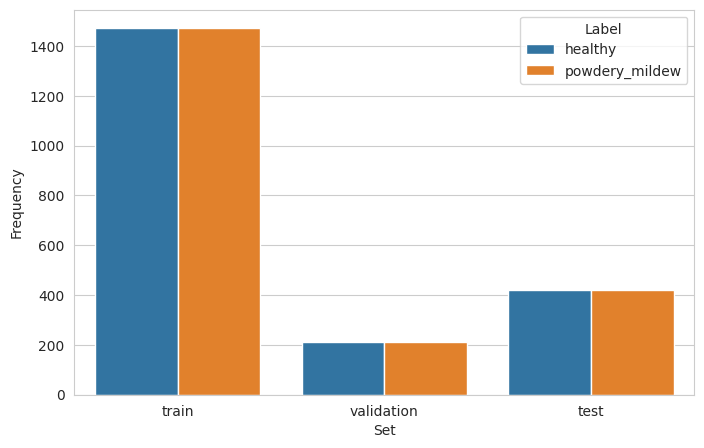

In [9]:
import pandas as pd
freq = pd.DataFrame([])
for folder in ['train', 'validation', 'test']:
    for label in labels:
        freq = freq.append(
            pd.Series(data={'Set': folder,
                            'Label': label,
                            'Frequency': int(len(os.listdir(cherry_leaves_dir + '/' + folder + '/' + label)))}
                        ),
            ignore_index=True
        )
        print(
            f"* {folder} - {label}: {len(os.listdir(cherry_leaves_dir+'/'+ folder + '/' + label))} images")

sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_img_distribution.png',
            bbox_inches='tight', dpi=150)
plt.show()

### Import Image Data Generator

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Image Augmentation

In [11]:
augment = ImageDataGenerator(rotation_range=20,
                            width_shift_range=0.10,
                            height_shift_range=0.10,
                            shear_range=0.1,
                            zoom_range=0.1,
                            horizontal_flip=True,
                            vertical_flip=True,
                            fill_mode='nearest',
                            rescale=1./255
                            )

### Augment Train, Validation and Test Image Sets

In [12]:
batch_size = 25
train_set = augment.flow_from_directory(train_dir,
                                        target_size=image_shape[:2],
                                        color_mode='rgb',
                                        batch_size=batch_size,
                                        class_mode='binary',
                                        shuffle=True
                                        )

validation_set = augment.flow_from_directory(validation_dir,
                                        target_size=image_shape[:2],
                                        color_mode='rgb',
                                        batch_size=batch_size,
                                        class_mode='binary',
                                        shuffle=False
                                        )

test_set = augment.flow_from_directory(test_dir,
                                        target_size=image_shape[:2],
                                        color_mode='rgb',
                                        batch_size=batch_size,
                                        class_mode='binary',
                                        shuffle=False
                                        )

Found 2944 images belonging to 2 classes.
Found 420 images belonging to 2 classes.
Found 844 images belonging to 2 classes.


In [13]:
import matplotlib.pyplot as plt

### Plot Augmentated Images

(100, 100, 3)


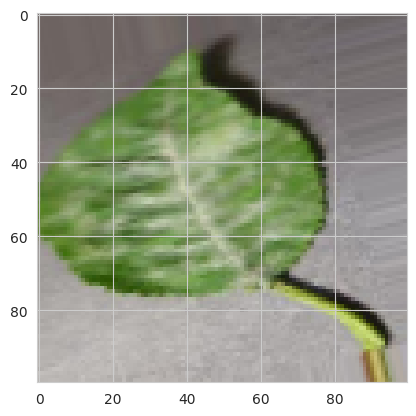

(100, 100, 3)


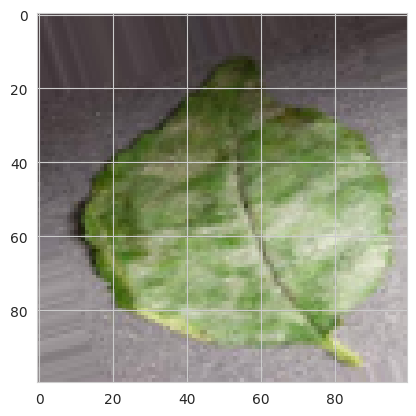

(100, 100, 3)


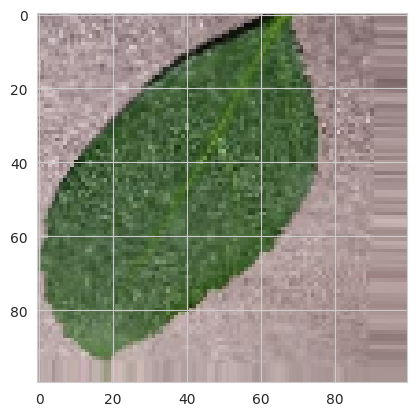

In [14]:
for _ in range(3):
    img, label = train_set.next()
    print(image_shape)
    plt.imshow(img[0])
    plt.show()

(100, 100, 3)


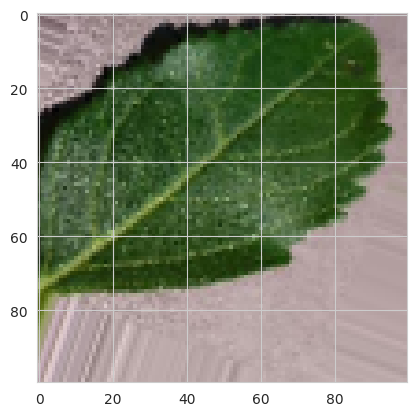

(100, 100, 3)


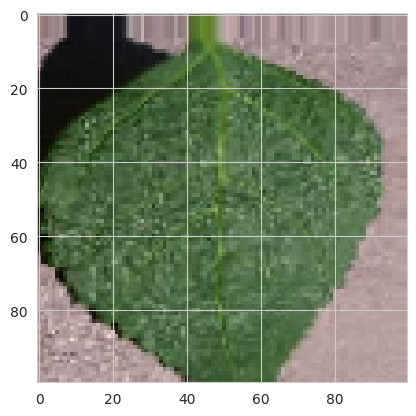

(100, 100, 3)


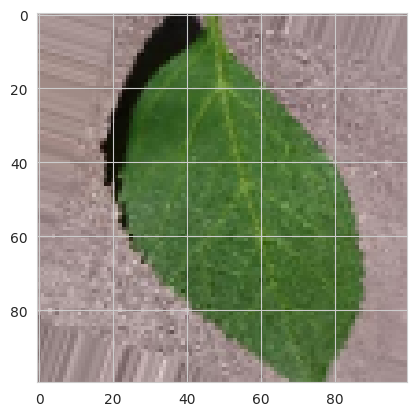

In [15]:
for _ in range(3):
    img, label = validation_set.next()
    print(image_shape)
    plt.imshow(img[0])
    plt.show()

(100, 100, 3)


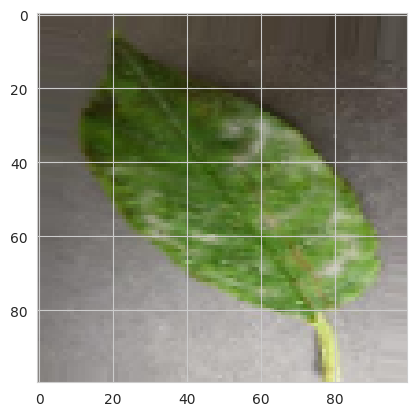

(100, 100, 3)


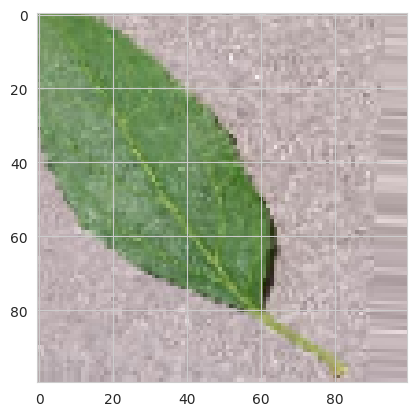

(100, 100, 3)


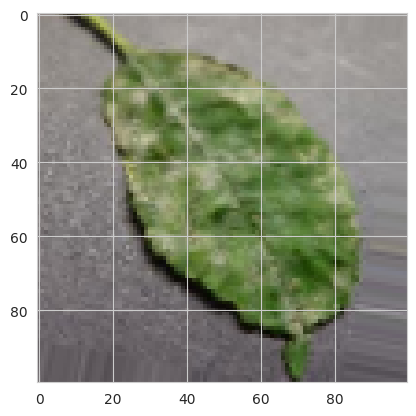

In [16]:
for _ in range(3):
    img, label = train_set.next()
    print(image_shape)
    plt.imshow(img[0])
    plt.show()

In [28]:
joblib.dump(value=train_set.class_indices ,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

### Create CNN Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

def create_model(image_shape=(100, 100, 3)):
    model = Sequential()

    model.add(Conv2D(filters=16, kernel_size=(3,3),
                        input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=32, kernel_size=(3,3),
                        input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3),
                        input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [18]:
create_model().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0

2024-09-01 18:19:28.797367: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Early Stoppage

In [19]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=5)

### Prepare Model For Training

In [20]:
model = create_model()
model.fit(train_set,
        epochs=15,
        validation_data=validation_set,
        verbose=1,
        callbacks=[early_stop]
        )

2024-09-01 18:19:28.980483: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15
118/118 [==============================] - 25s 211ms/step - loss: 0.2124 - accuracy: 0.9069 - val_loss: 0.0441 - val_accuracy: 0.9857
Epoch 2/15
118/118 [==============================] - 24s 208ms/step - loss: 0.0552 - accuracy: 0.9851 - val_loss: 0.0369 - val_accuracy: 0.9929
Epoch 3/15
118/118 [==============================] - 24s 203ms/step - loss: 0.0323 - accuracy: 0.9915 - val_loss: 0.0203 - val_accuracy: 0.9929
Epoch 4/15
118/118 [==============================] - 24s 205ms/step - loss: 0.0328 - accuracy: 0.9898 - val_loss: 0.0131 - val_accuracy: 0.9976
Epoch 5/15
118/118 [==============================] - 24s 205ms/step - loss: 0.0242 - accuracy: 0.9949 - val_loss: 0.0556 - val_accuracy: 0.9833
Epoch 6/15
118/118 [==============================] - 24s 203ms/step - loss: 0.0174 - accuracy: 0.9949 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 7/15
118/118 [==============================] - 24s 204ms/step - loss: 0.0448 - accuracy: 0.9878 - val_loss: 0.0158 - val_ac

### Save The Model

In [21]:
model.save('outputs/v1/Mildew_Detection_Model.h5')

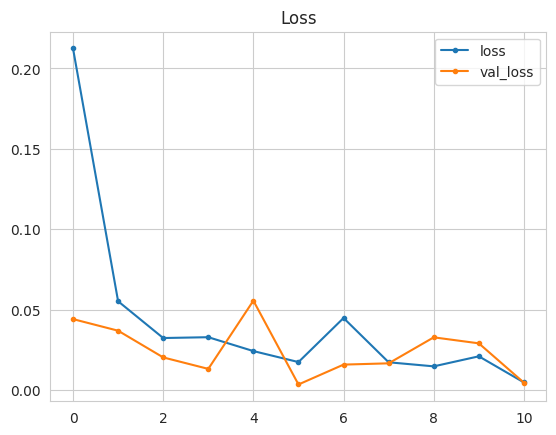

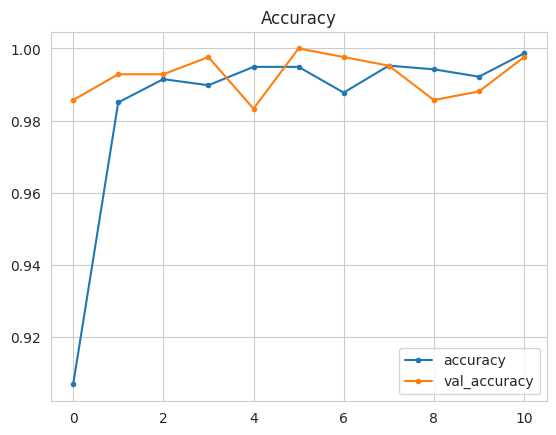

In [22]:
mlc_loss = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
mlc_loss[['loss', 'val_loss']].plot(style='.-')
plt.title('Loss')
plt.savefig(f'{file_path}/model_losses.png',
            bbox_inches='tight', dpi=150)
plt.show()

mlc_loss[['accuracy', 'val_accuracy']].plot(style='.-')
plt.title('Accuracy')
plt.savefig(f'{file_path}/model_acc.png',
            bbox_inches='tight', dpi=150)
plt.show()

### Load Model

In [23]:
from keras.models import load_model
model = load_model('outputs/v1/Mildew_Detection_Model.h5')

In [24]:
asses = model.evaluate(test_set)
joblib.dump(value=asses,
            filename=f"outputs/v1/assessment.pkl")

34/34 [==============================] - 3s 73ms/step - loss: 0.0031 - accuracy: 0.9988


['outputs/v1/assessment.pkl']

Image shape: (100, 100), Image mode: RGB


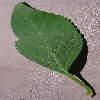

In [25]:
from tensorflow.keras.preprocessing import image

image_number = 159
label = labels[0]

pil_image = image.load_img(test_dir + '/' + label + '/' + os.listdir(test_dir + '/' + label)[image_number],
                            target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image

In [26]:
img_array = image.img_to_array(pil_image)
img_array = np.expand_dims(img_array, axis=0)/255
print(img_array.shape)

(1, 100, 100, 3)


In [27]:
probability = model.predict(img_array)[0, 0]
target_map = {v: k for k, v in train_set.class_indices.items()}

probability = model.predict(img_array)[0, 0]
prediction_class = target_map[probability > 0.5]

if prediction_class == target_map[0]:
    probability = 1 - probability

print(probability)
print(prediction_class)

0.9999997269065943
healthy


---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---